In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score

import warnings
warnings.filterwarnings('ignore')

AIM:

Airline companies use complex algorithms to calculate flight prices given various conditions present at that particular time.
These methods take financial, marketing, and various social factors into account to predict flight prices.

Nowadays, the number of people using flights has increased significantly.
It is difficult for airlines to maintain prices since prices change dynamically due to different conditions. 
That’s why we will try to use machine learning to solve this problem.
This can help airlines by predicting what prices they can maintain. 
It can also help customers to predict future flight prices and plan their journey accordingly.

In [2]:
df=pd.read_csv('flight_data.csv')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


As we saw in Data Analysis there are 11 variables in the given data. Below is the description of each variable.

Airline: Name of the airline used for traveling

Date_of_Journey: Date at which a person traveled

Source: Starting location of flight

Destination: Ending location of flight

Route: This contains information on starting and ending location of the journey in the standard format used by airlines.

Dep_Time: Departure time of flight from starting location

Arrival_Time: Arrival time of flight at destination

Duration: Duration of flight in hours/minutes

Total_Stops: Number of total stops flight took before landing at the destination.

Additional_Info: Shown any additional information about a flight

Price: Price of the flight

Few observations about some of the variables:

1. ‘Price‘ will be our dependent variable and all remaining variables can be used as independent variables.

2. ‘Total_Stops‘ can be used to determine if the flight was direct or connecting.

# Handling Missing Values

In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
#As we found out the ‘Route’ and ‘Total_Stops’ variables have very low missing values in data.

In [6]:
df.dropna(inplace=True)          #In this case, it is better to drop missing values.

In [7]:
df.shape                          #In this case total 10682 records and 11 colunm are present

(10682, 11)

In [8]:
df.info()                        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [9]:
#df.info represent the total no col is 11 and bo of row is 10682 and here there is zero null values are present

# lets do the EDA

In [10]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [11]:
#lets replace date_of_journey with seperate col as journey_day and journey_month

In [12]:
df['journey_day']=pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.day
df['journey_month']=pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.month

In [13]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [14]:
#also create dept_hour,dept_min from dept_time column
df['dep_hour']=pd.to_datetime(df.Dep_Time).dt.hour
df['dep_min']=pd.to_datetime(df.Dep_Time).dt.minute

In [15]:
 df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [16]:
#now we can dep_time and date_of_journey col
df.drop(columns=['Date_of_Journey','Dep_Time'],axis=1,inplace=True)

In [17]:
 df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [18]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [19]:
#lets convert duration column into list
duration=list(df.Duration)
len(duration)

10682

In [20]:
duration[1]

'7h 25m'

In [21]:
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [22]:
  df['Duration'].nunique()

368

In [23]:
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]       #adds 0 hours

In [24]:
#create a separate list for dur_hours and duration_time
duration_hours= []
duration_mins= []
for i in range(len(duration)):
    duration_hours.append((duration[i].split()[0][:-1]))  # to extract hour
    duration_mins.append((duration[i].split()[1][:-1]))   #to extract mins from duration

In [25]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
journey_day         int64
journey_month       int64
dep_hour            int64
dep_min             int64
dtype: object

In [26]:
duration_mins

['50',
 '25',
 '0',
 '25',
 '45',
 '25',
 '30',
 '5',
 '30',
 '50',
 '15',
 '35',
 '15',
 '10',
 '35',
 '35',
 '30',
 '35',
 '0',
 '35',
 '10',
 '20',
 '50',
 '55',
 '20',
 '10',
 '45',
 '55',
 '50',
 '15',
 '15',
 '25',
 '50',
 '0',
 '30',
 '25',
 '15',
 '30',
 '15',
 '55',
 '5',
 '30',
 '5',
 '45',
 '0',
 '50',
 '50',
 '15',
 '5',
 '55',
 '15',
 '20',
 '50',
 '0',
 '50',
 '15',
 '5',
 '15',
 '30',
 '5',
 '25',
 '20',
 '15',
 '30',
 '15',
 '25',
 '50',
 '30',
 '20',
 '15',
 '25',
 '30',
 '20',
 '30',
 '0',
 '45',
 '50',
 '30',
 '5',
 '15',
 '50',
 '40',
 '10',
 '35',
 '0',
 '20',
 '25',
 '45',
 '20',
 '0',
 '15',
 '5',
 '30',
 '20',
 '35',
 '25',
 '40',
 '0',
 '25',
 '35',
 '20',
 '15',
 '30',
 '0',
 '45',
 '55',
 '10',
 '30',
 '20',
 '55',
 '0',
 '55',
 '45',
 '10',
 '55',
 '25',
 '5',
 '10',
 '40',
 '55',
 '40',
 '25',
 '5',
 '15',
 '25',
 '10',
 '10',
 '0',
 '50',
 '20',
 '0',
 '55',
 '10',
 '45',
 '0',
 '50',
 '40',
 '15',
 '45',
 '50',
 '0',
 '15',
 '25',
 '35',
 '50',
 '35',
 '2

In [27]:
#now we can create columns using above list
df['duration_hours']=duration_hours
df['duration_mins']=duration_mins

In [28]:
df['duration_hours'] = df['duration_hours'].astype(int)
df['duration_mins'] = df['duration_mins'].astype(int)

In [29]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
journey_day         int64
journey_month       int64
dep_hour            int64
dep_min             int64
duration_hours      int32
duration_mins       int32
dtype: object

In [30]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,7,25


In [31]:
df.drop(['Duration'],inplace=True,axis=1)               #drop duration col

In [32]:
#unique records and their frequency in airline
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

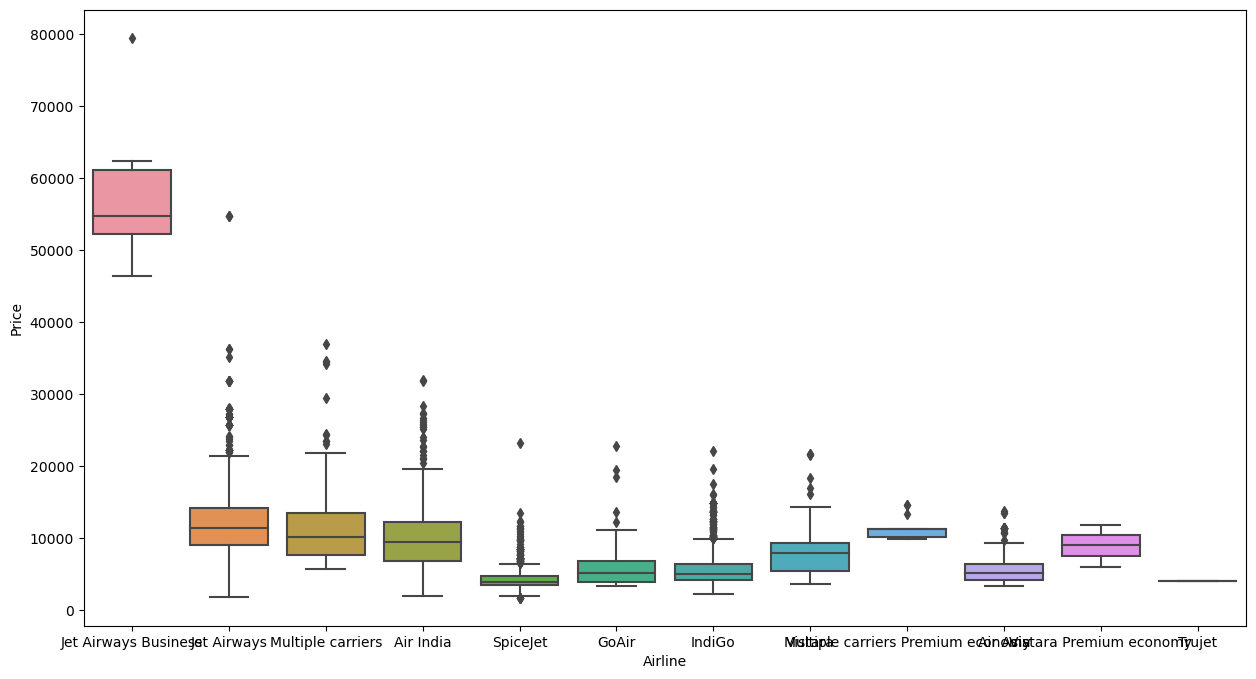

In [33]:
#Airline vs Price Analysis
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

In [34]:
#From graph we can see that Jet Airways Business have the highest Price.,
#Apart from the first Airline almost all are having similar median

In [35]:
#df.Airline=df.Airline.apply(lambda x:x.strip())
#airline_stats= df.Airline.value_counts(ascending=False)

In [36]:
df.Airline

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10682, dtype: object

In [37]:
#we can apply dimenstionally reduction 
#airline_stats_less_than_10=airline_stats[airline_stats<=10]

In [38]:
#df.Airline=df.Airline.apply(lambda x: 'other' if x in airline_stats_less_than_10 else x )

In [39]:
#df.Airline.nunique()

In [40]:
df.Airline

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10682, dtype: object

In [41]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

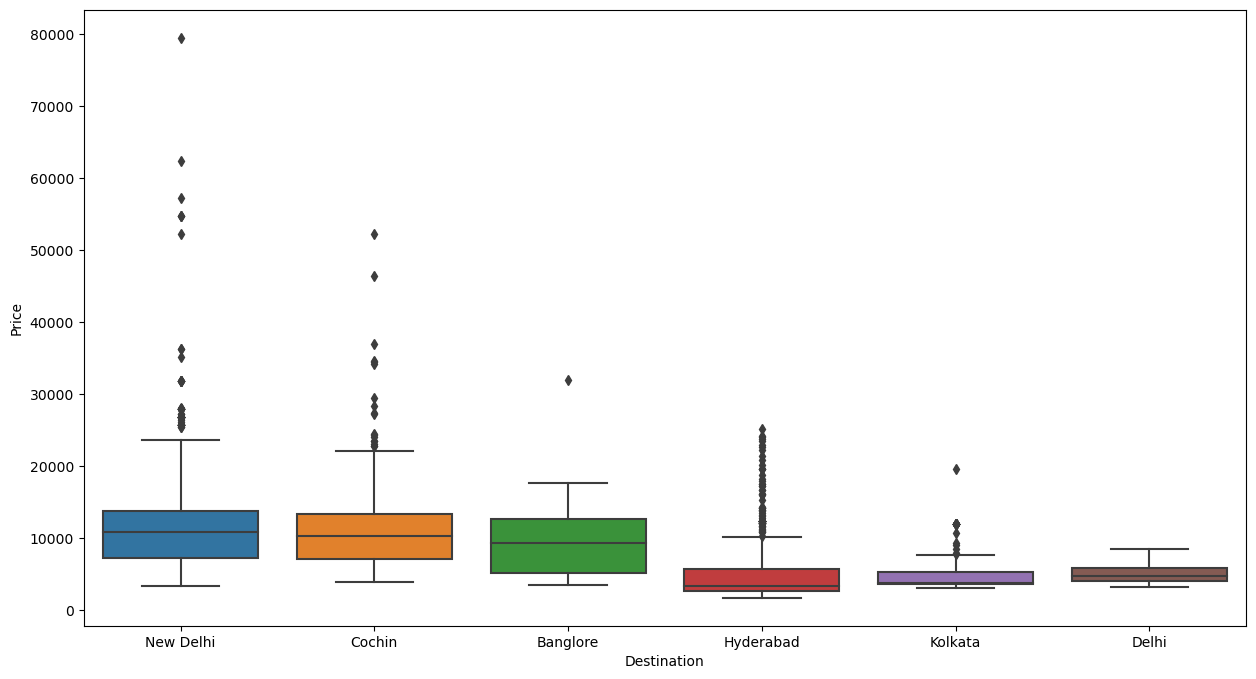

In [42]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

In [43]:
df.Route.head()             # now work on route column

0                BLR ? DEL
1    CCU ? IXR ? BBI ? BLR
2    DEL ? LKO ? BOM ? COK
3          CCU ? NAG ? BLR
4          BLR ? NAG ? DEL
Name: Route, dtype: object

In [44]:
df.Route.value_counts()

DEL ? BOM ? COK          2376
BLR ? DEL                1552
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
                         ... 
CCU ? VTZ ? BLR             1
CCU ? IXZ ? MAA ? BLR       1
BOM ? COK ? MAA ? HYD       1
BOM ? CCU ? HYD             1
BOM ? BBI ? HYD             1
Name: Route, Length: 128, dtype: int64

In [45]:
df['Route1']=df['Route'].str.split('→').str[0]
df['Route2']=df['Route'].str.split('→').str[1]
df['Route3']=df['Route'].str.split('→').str[2]
df['Route4']=df['Route'].str.split('→').str[3]
df['Route5']=df['Route'].str.split('→').str[4]

In [46]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Route                  0
Arrival_Time           0
Total_Stops            0
Additional_Info        0
Price                  0
journey_day            0
journey_month          0
dep_hour               0
dep_min                0
duration_hours         0
duration_mins          0
Route1                 0
Route2             10682
Route3             10682
Route4             10682
Route5             10682
dtype: int64

In [47]:
for i in ['Route3', 'Route4', 'Route5']:
    df[i].fillna('None',inplace=True)

In [48]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Route                  0
Arrival_Time           0
Total_Stops            0
Additional_Info        0
Price                  0
journey_day            0
journey_month          0
dep_hour               0
dep_min                0
duration_hours         0
duration_mins          0
Route1                 0
Route2             10682
Route3                 0
Route4                 0
Route5                 0
dtype: int64

In [49]:
#Handling categorical data
#We are using two main Encoding Techniques to covert Categorical data into some numerical format
#Nominal data -- Data that are not in any order -->one hot encoding
#ordinal data -- Data are in order --> labelEncoder

In [50]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [51]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    df[i]=encoder.fit_transform(df[i])

In [52]:
df.Route1

0         18
1         84
2        118
3         91
4         29
        ... 
10678     64
10679     64
10680     18
10681     18
10682    108
Name: Route1, Length: 10682, dtype: int32

In [53]:
df.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [54]:
df.drop(['Additional_Info','Route'],inplace=True,axis=1)

In [55]:
df.head(2)

,Airline,Source,Destination,Arrival_Time,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,duration_hours,duration_mins,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,non-stop,3897,24,3,22,20,2,50,18,0,0,0,0
1,Air India,Kolkata,Banglore,13:15,2 stops,7662,1,5,5,50,7,25,84,0,0,0,0


In [56]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

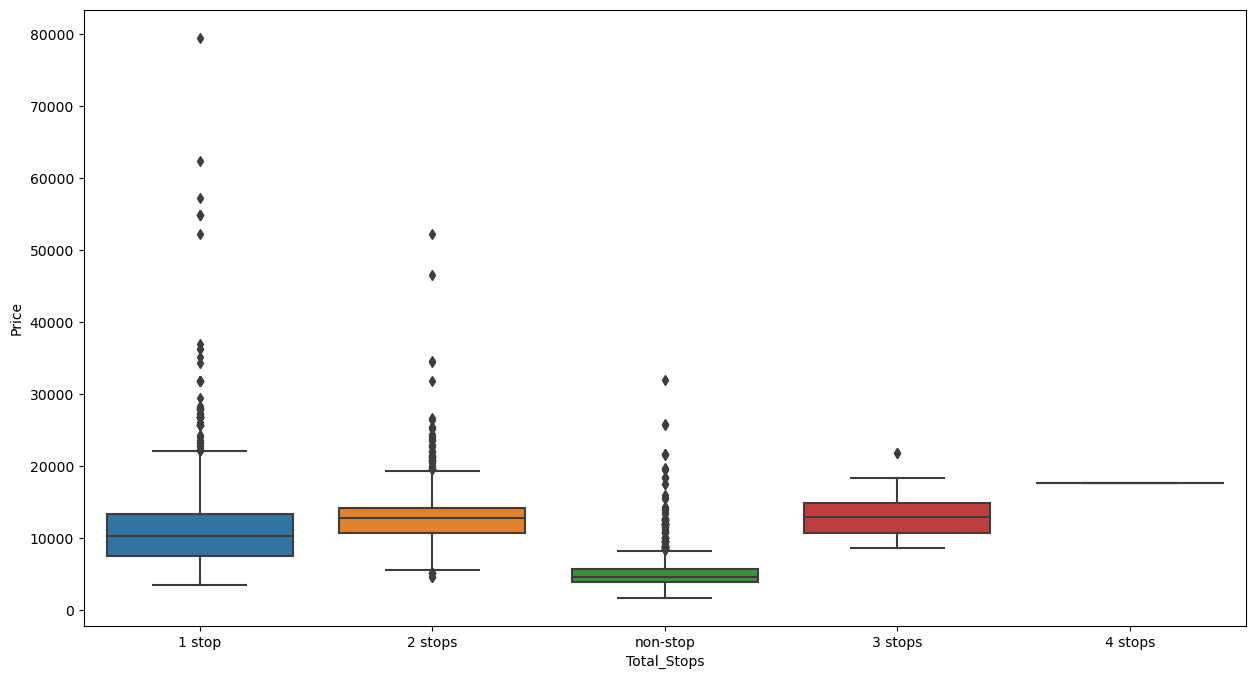

In [57]:
#Perform Total_Stops vs Price Analysis
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

In [58]:
df.head(2)

,Airline,Source,Destination,Arrival_Time,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,duration_hours,duration_mins,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,non-stop,3897,24,3,22,20,2,50,18,0,0,0,0
1,Air India,Kolkata,Banglore,13:15,2 stops,7662,1,5,5,50,7,25,84,0,0,0,0


In [59]:
#Total_stopes is a ordinal categorical column so we will label it
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [60]:
#using arrival time create new col as arrival hour and min
df['Arrival_hour']=pd.to_datetime(df.Arrival_Time).dt.hour
df['Arrival_min']=pd.to_datetime(df.Arrival_Time).dt.minute

In [61]:
df.head(2)

,Airline,Source,Destination,Arrival_Time,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,duration_hours,duration_mins,Route1,Route2,Route3,Route4,Route5,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,0,3897,24,3,22,20,2,50,18,0,0,0,0,1,10
1,Air India,Kolkata,Banglore,13:15,2,7662,1,5,5,50,7,25,84,0,0,0,0,13,15


In [62]:
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [63]:
# As Airline,source,destination is Nominal Categorical data we will perform OneHotEncoding

In [64]:
df_dummies=pd.get_dummies(data=df,columns=['Airline','Source','Destination'],drop_first=True)

In [65]:
df_dummies

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,duration_hours,duration_mins,Route1,Route2,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,2,50,18,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,7,25,84,0,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,19,0,118,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,5,25,91,0,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,4,45,29,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,2,30,64,0,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,2,35,64,0,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,3,0,18,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,2,40,18,0,...,0,0,0,0,0,0,0,0,0,1


In [66]:
#independent and dependent features
x=df_dummies.drop('Price',axis=1)
y=df_dummies['Price']

In [67]:
x

,Total_Stops,journey_day,journey_month,dep_hour,dep_min,duration_hours,duration_mins,Route1,Route2,Route3,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,2,50,18,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,7,25,84,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,19,0,118,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,5,25,91,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,4,45,29,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,2,30,64,0,0,...,0,0,0,1,0,0,0,0,0,0
10679,0,27,4,20,45,2,35,64,0,0,...,0,0,0,1,0,0,0,0,0,0
10680,0,27,4,8,20,3,0,18,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,11,30,2,40,18,0,0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [69]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=123)

In [70]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(x_train,y_train)
    print("Training score: {}".format(model.score(x_train,y_train)))
    print("Testing score: {}".format(model.score(x_test,y_test)))
    
    ypred = model.predict(x_test)
    print("Predictions are: {}".format(ypred))
    print('\n')
    r2score=r2_score(y_test,ypred) 
    print("r2 score is: {}".format(r2score))
   
          
    print('MAE:{}'.format(mean_absolute_error(y_test,ypred)))
    print('MSE:{}'.format(mean_squared_error(y_test,ypred)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,ypred))))
     
    #sns.distplot(y_test-predictions) 
    sns.distplot(y_test)
    sns.distplot(ypred)
   
    

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

# ************K NEAREST NEIGHBOURS *******************

Model is: KNeighborsRegressor()
Training score: 0.7625729712417496
Testing score: 0.683420875362033
Predictions are: [ 8355.4 16362.4 12933.2 ...  3757.   9073.  11232.4]


r2 score is: 0.683420875362033
MAE:1616.2993916705661
MSE:6095945.544464203
RMSE:2468.9968700798718


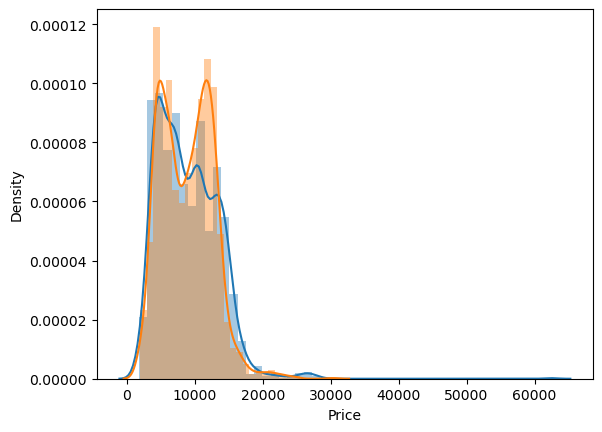

In [72]:
predict(KNeighborsRegressor())

# ***************** LOGISTIC REGRESSION *********************

Model is: LogisticRegression()
Training score: 0.20889409011117613
Testing score: 0.16939635002339729
Predictions are: [ 4226 17024 10844 ... 14781 13587 10262]


r2 score is: 0.2318485544975284
MAE:2454.8872250818904
MSE:14791276.54749649
RMSE:3845.9428684649606


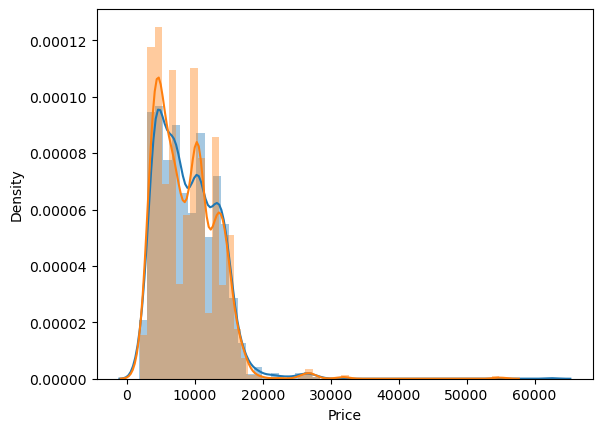

In [73]:
predict(LogisticRegression())

# **********************SUPPORT VECTOR MACHINE*********************

Model is: SVC()
Training score: 0.14031597425394968
Testing score: 0.13664014974262986
Predictions are: [10844 10262 10844 ... 10844 10262 10262]


r2 score is: 0.287047759809155
MAE:2473.586803930744
MSE:13728378.448759943
RMSE:3705.1826471524914


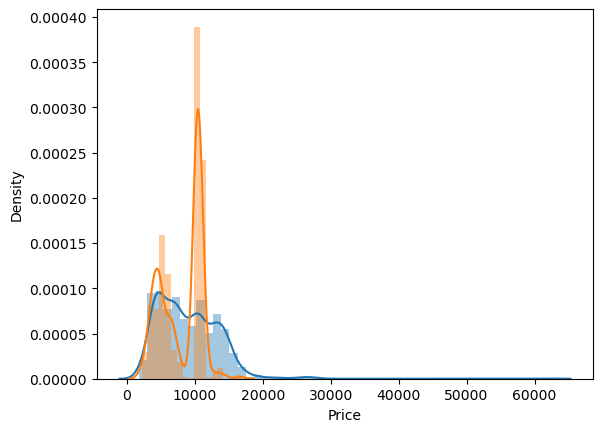

In [74]:
from sklearn.svm import SVC
predict(SVC())

# ***********DECISION TREE*********

Model is: DecisionTreeRegressor()
Training score: 0.9701124435927416
Testing score: 0.7414532416434594
Predictions are: [ 8996. 18550. 14571. ...  3717.  5684. 10262.]


r2 score is: 0.7414532416434594
MAE:1240.5748713149276
MSE:4978493.01163365
RMSE:2231.2536860773253


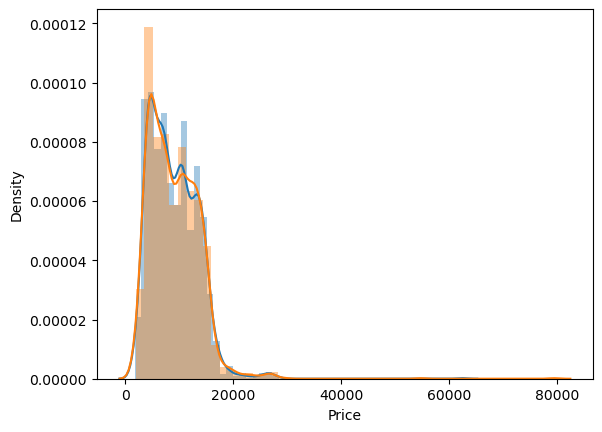

In [75]:
predict(DecisionTreeRegressor())

# *********RANDOM FOREST********

Model is: RandomForestRegressor()
Training score: 0.9518190803945915
Testing score: 0.8415112608945393
Predictions are: [ 8529.57       17258.05       14115.82933333 ...  3830.38
  5652.42       10572.26      ]


r2 score is: 0.8415112608945393
MAE:1089.989622670147
MSE:3051808.0562088173
RMSE:1746.942487951111


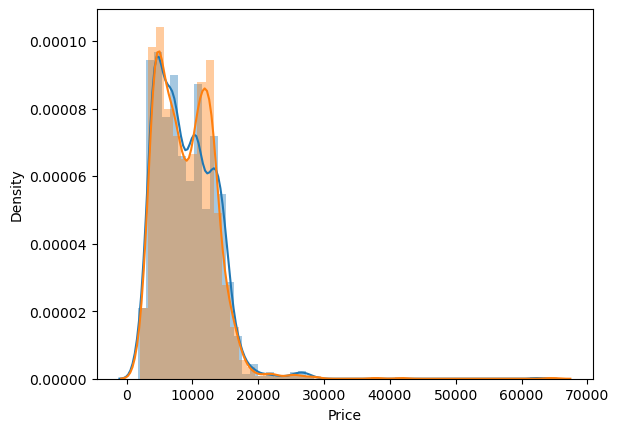

In [76]:
predict(RandomForestRegressor())

# *************GRADIENTBOOSTING*******

Model is: GradientBoostingRegressor()
Training score: 0.7871385678739188
Testing score: 0.8045928153777908
Predictions are: [ 5558.03192901 16031.64188004 12051.16757838 ...  5050.90289177
  6511.52016626 11984.86186023]


r2 score is: 0.8045928153777908
MAE:1437.77715185028
MSE:3762697.738886829
RMSE:1939.767444537316


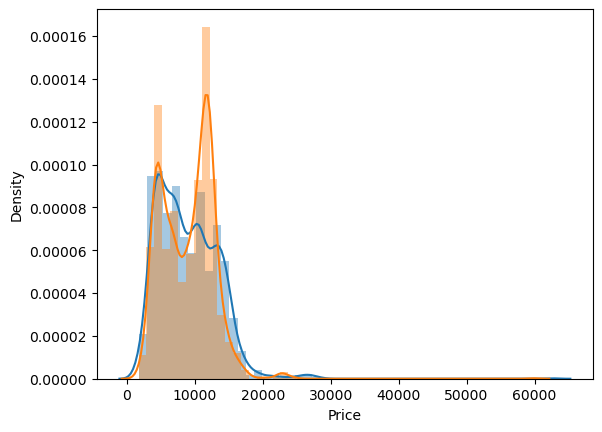

In [77]:
predict(GradientBoostingRegressor())

# ********Hypertunning the model*********

# choose following method for hyperparameter tunning 

 1)RandomizedSearchCV------>Fast
 2)GridSearchCV
 
#Assign hyperparameters in form of dictionary

#fit the model

#check the best parameter and best model

In [78]:
#got the best accuracy for random forest

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
#Randomized Search CV

n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]       #no of trees in random forest
max_features =['auto','sqrt']                                                  #no of featues to consider at every split
max_depth =[int(x) for x in np.linspace(5,30,num=6)]                            #max no of levels in tree
min_samples_split =[2,5,10,15,100]                                            #min no of samples required to splits a node
min_samples_leaf=[1,2,5,10]                                                  #min no of samples required at each leaf node
    


In [81]:

#create the random grid
random_grid = {
    'n_estimators' : n_estimators,
    'max_features':max_features,                                               
    'max_depth':max_depth,                                                      
    'min_samples_split':min_samples_split ,                                     
    'min_samples_leaf':min_samples_leaf}

In [82]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',cv=5,verbose=2,n_jobs=1,random_state=42,n_iter=10)

rf_random.fit(x_train,y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [83]:
# best parameter
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

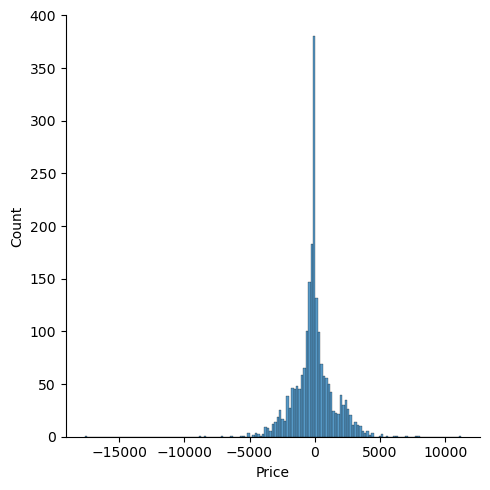

In [84]:
#predicting the values
ypred= rf_random.predict(x_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-ypred)

In [85]:
r2_score(y_test,ypred)

0.8690538216576833

# *************Predicting New Observation**********

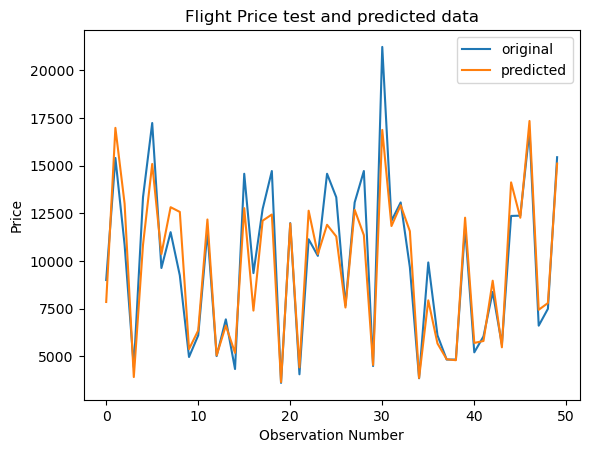

In [86]:
number_of_observations=50
x_new = range(len(y_test[:number_of_observations]))

plt.plot(x_new, y_test[:number_of_observations], label="original")

plt.plot(x_new,ypred[:number_of_observations], label="predicted")

plt.title("Flight Price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

plt.show()


##### 